# Classification of Incomes

I took on a classification project from the UCI Machine Learning Repository. The aim of the project is to predict whether an individual's income is either above or below 50k, using explanatory variables. This is binary classification - two discrete outputs based on features. 

This dataset was derived from the 1994 US census. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('incomedata.csv')

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


First missing data points need to be cleaned up.

In [4]:
#upon inspection missing values are represented with a ' ?'
df = df.replace(' ?', np.nan)

In [5]:
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


A straightforward way to replace missing values is using SimpleImputer. Since the dataset has categorical variables, replacing missing values with the most common type in that column makes sense. 

Note that this benefits our model more than just dropping the rows with missing values. 

In [6]:
imputer = SimpleImputer(missing_values = np.nan,  
                        strategy ='most_frequent')  

# Fitting the data to the imputer object 
imputer = imputer.fit(df) 
  
# Imputing the data while keeping the dataframe format      
df[ : ] = imputer.transform(df) 

In [7]:
#there are now no missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Since the dataframe contains categorical and numerical variables, it makes sense to explore them seperately. 

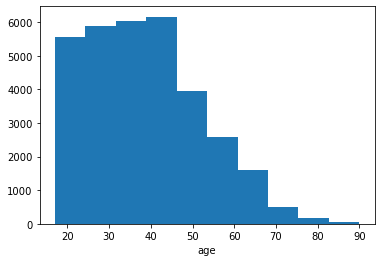

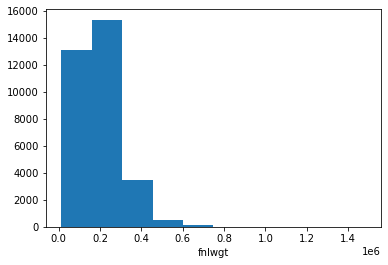

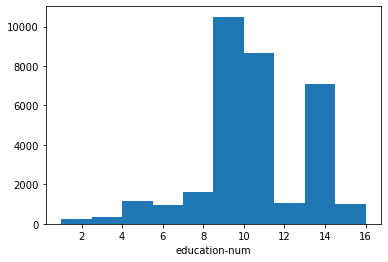

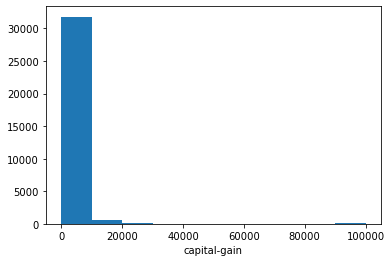

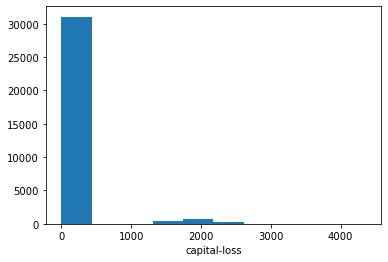

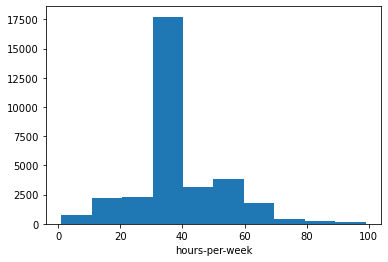

In [8]:
for column in df.columns: 
    if df[column].dtypes == 'int64':
        plt.hist(df[column])
        plt.xlabel(column)
        plt.show()

Things to note from histograms : 

Age : right-skewed, there is a higher number of young people in the survey. 

fnlweight : this is the estimated number of people in the population each row in the data represents. This may not be very important in our analysis. 

education-num : most people have between 9 and 11 or 13-14 years of education. This may be the difference between either high school and college graduates. 

capital-gain/loss :  income from investment sources other than salary/wages. Most people lie in the lower bounds here. 

hours-per-week : unsurprisingly the number of hours worked per week peeks around 40 hours. 

In [9]:
for column in df.columns: 
    if df[column].dtypes == 'object':
        display(pd.crosstab(df[column], df.income, margins=True))

income,<=50K,>50K,All
workclass,,,
Federal-gov,589,371,960
Local-gov,1476,617,2093
Never-worked,7,0,7
Private,19378,5154,24532
Self-emp-inc,494,622,1116
Self-emp-not-inc,1817,724,2541
State-gov,945,353,1298
Without-pay,14,0,14
All,24720,7841,32561


income,<=50K,>50K,All
education,,,
10th,871,62,933
11th,1115,60,1175
12th,400,33,433
1st-4th,162,6,168
5th-6th,317,16,333
7th-8th,606,40,646
9th,487,27,514
Assoc-acdm,802,265,1067
Assoc-voc,1021,361,1382


income,<=50K,>50K,All
marital-status,,,
Divorced,3980,463,4443
Married-AF-spouse,13,10,23
Married-civ-spouse,8284,6692,14976
Married-spouse-absent,384,34,418
Never-married,10192,491,10683
Separated,959,66,1025
Widowed,908,85,993
All,24720,7841,32561


income,<=50K,>50K,All
occupation,,,
Adm-clerical,3263,507,3770
Armed-Forces,8,1,9
Craft-repair,3170,929,4099
Exec-managerial,2098,1968,4066
Farming-fishing,879,115,994
Handlers-cleaners,1284,86,1370
Machine-op-inspct,1752,250,2002
Other-service,3158,137,3295
Priv-house-serv,148,1,149


income,<=50K,>50K,All
relationship,,,
Husband,7275,5918,13193
Not-in-family,7449,856,8305
Other-relative,944,37,981
Own-child,5001,67,5068
Unmarried,3228,218,3446
Wife,823,745,1568
All,24720,7841,32561


income,<=50K,>50K,All
race,,,
Amer-Indian-Eskimo,275,36,311
Asian-Pac-Islander,763,276,1039
Black,2737,387,3124
Other,246,25,271
White,20699,7117,27816
All,24720,7841,32561


income,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


income,<=50K,>50K,All
native-country,,,
Cambodia,12,7,19
Canada,82,39,121
China,55,20,75
Columbia,57,2,59
Cuba,70,25,95
Dominican-Republic,68,2,70
Ecuador,24,4,28
El-Salvador,97,9,106
England,60,30,90


income,<=50K,>50K,All
income,,,
<=50K,24720,0,24720
>50K,0,7841,7841
All,24720,7841,32561


Things to note from crosstab: 

workclass : it might be useful to combine some of these categories, e.g. government or private work 

education : again, combining some of these e.g. before high school, high school, higher education. 

marital-status/relationship : note that the marital-status information is repeated in the relationship column 

occupation : these vary enough that it may be useful to keep all the categories. It also makes sense that knowing a person's occupation will be very useful in predicting their income. 

race : there aren't too many categories here so leaving it as is shouldn't add to complexity much. 

sex : Unsurprisingly since this data was collected in 1994, a higher percentage of men earn more than 50k than women do. 

native-country : even though there are many countries, the overwhelming amount of individuals are from the US since this is an American census. 

income : far more people earn less than 50k. 

# Standardisation and Splitting

The next thing to do is to standardise the data and to split it into training and test sets. 

In [10]:
features = df.drop(['income'], axis =1)
target = df['income'].values

In [11]:
features = pd.get_dummies(features, drop_first = True)

In [12]:
#standard scaler transforms features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

In [13]:
#target binary outcome 
target = pd.get_dummies(target,drop_first=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.3, random_state = 42)

# Feature Selection

With testing on the training data it is found that simplifying the education, workclass and native country columns all add to the accuracy of the model. 

In [15]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [16]:
education = list()
for level in df['education']: 
    if level in [ 'HS-grad', ' 11th', '9th',' 7th-8th',' 5th-6th',' 10th',' 1st-4th',\
                     ' Preschool',' 12th']:
        education.append('no_higher_level')
    else : 
        education.append('higher_level')

In [17]:
df['education'] = education

In [18]:
workclass = list()
for wclass in df['workclass']: 
    if wclass in [' State-gov',' Federal-gov',' Local-gov']:
        workclass.append('govt')
    if wclass == ' Without-pay': 
        workclass.append('Without_pay')
    if wclass == ' Never-worked': 
        workclass.append('Never_worked')
    elif wclass in [' Self-emp-not-inc',' Private',' Self-emp-inc']:
        workclass.append('private_or_self_employed')

In [19]:
df['workclass'] = workclass

In [20]:
native_country = list()
for country in df['native-country']: 
    if country != ' United-States': 
        native_country.append('Other')
    else: 
        native_country.append('United-States')

In [21]:
df['native-country'] = native_country

Through testing, the column final weight actually takes away from the accuracy of the model. 

In [22]:
df=df.drop('fnlwgt',axis=1)

The marital status column can also be dropped because the information is repeated in the relationship column. 

In [23]:
df=df.drop('marital-status',axis=1)

In [24]:
#redefine features and target
features = df.drop(['income'], axis =1)
target = df['income'].values

features = pd.get_dummies(features, drop_first = True)

#standard scaler transforms features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

target = pd.get_dummies(target,drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.3, random_state = 42)

## Logistic Regression

Logistic regression works on binary outcomes. It outputs probabilities. If this probability is greater than 0.5 the data gets labelled as 1, 0 otherwise. Logistic regression is estimated with Maximum Likelihood Estimation (MLE), unlike linear regression which uses OLS.  

Note that standardisation will not add to the accuracy of the logistic model. This is because logistic regression is linear. A linear relationship searchs for how much a change in a feature will affect the target variable. Standardisation does not change that relationship.

Performing cross-validation on the training data allowed for feature selection testing. 

In [26]:
logreg = LogisticRegression(max_iter=111)
logreg.fit(X_train, y_train.values.ravel())

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(logreg, X_train, y_train.values.ravel(), cv =5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {:.4f}".format(np.mean(cv_scores)))

/Users/labhaoisebarrett/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.84514148 0.85150252 0.84993418 0.85081176 0.84554629]
Average 5-Fold CV Score: 0.8486


In [219]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.8502


# K Nearest Neighbors 

The k neighbors classifier works by taking the data point to be predicted, finding the k closest points to it and then use the majority class of those points to classify the new point. In our dataset, if the number of neighbors is set to 3, at least two of the three nearest points would have to fall into the under 50k class for the new data point to be classified as such. 

It is important to have as few features as possible when performing KNN, as to avoid overfitting, the amount of data needed will grow exponentially as the the number of dimensions increase. Feature selection has already been performed. 

The higher the k number of neighbors is the more likely it is to be accurate, up to a certain point. Testing that in a loop is simple. 

Standardisation is useful here. It is easier to understand the distances between points all on the same scale. 

In [326]:
max_score = 0
n_neighbors = 0
for n in range(1,30): 
    knn = KNeighborsClassifier(n_neighbors =n)
    transformed_features = knn.fit(X_train, y_train.values.ravel())
    cv_scores = cross_val_score(knn, X_train, y_train.values.ravel(), cv =5)
    if np.mean(cv_scores) > max_score: 
        max_score = np.mean(cv_scores)
        n_neighbors = n

In [328]:
print(max_score,n_neighbors)

0.8356439836492168 22


Using 22 neighbors gives the best score on the training data while not taking too long to run. 

In [325]:
knn = KNeighborsClassifier(n_neighbors = 22)
knn.fit(X_train, y_train.values.ravel())
knn.score(X_test, y_test)

0.8389804483570478

# ROC Curve

In building to the ROC curve it is useful to examine the confusion matrix first. 

In [220]:
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[6935  520]
 [ 943 1371]]


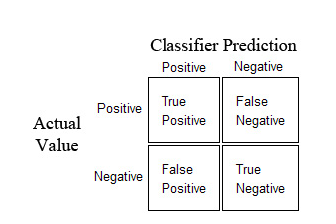

https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd

 The Receiver Operating Characteristic curve or ROC curve plots the true positive rate against the false positive rate of our model. 
 
The true positive rate is calculated as the number of true positives divided by the sum of the number of true positives and the number of false negatives. It describes how good the model is at predicting the positive class when the actual outcome is positive.

The true positive rate is the number of true positives over the total number of true positives and false negatives. It tells us how good our model is at predicting positive (1) when the actual outcome is positive. 

False negatives occur when the model predicts a positive (1) when the true outcome is negative (0).  

The top left corner is the ideal point - a false positive rate of zero and a true positive rate of one. This is not a likely scenario in the real world but it indicates that the larger the area under the curve (AUC) is, the better. 

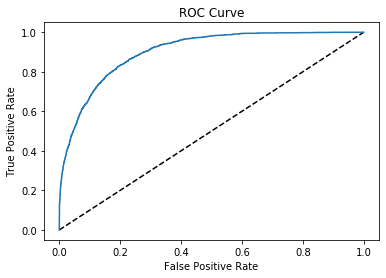

In [221]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The Area Under the Curve is another way to look at model accuracy. The diagonal line above represents a model that randomly predicts positive half the time and negative the other - so its AUC score is 0.5. At the least, our model is better than that. 

In [222]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,features, target.values.ravel(),cv =5, scoring = 'roc_auc')

# Print list of AUC scores
print("Average 5-Fold AUC CV Score: {:.4f}".format(np.mean(cv_auc)))

Average 5-Fold AUC CV Score: 0.9032


# Principal Components Analysis 

In [223]:
pca = PCA()
transformed_features = pca.fit_transform(features)
print (len(pca.explained_variance_ratio_))

33


PCA without dimension reduction uses 33 components in its model. If we want our PCA model to capture 80% we count the number of features whose proportions-of-variances-explained add up to 0.8

In [224]:
feature_list = list()
eighty_var = 0
for var in pca.explained_variance_ratio_: 
    eighty_var += var 
    feature_list.append(var)
    if eighty_var >= 0.8: 
        break 
print (len(feature_list))
print (eighty_var)

21
0.8183705591550503


20 components will capture 81.6% of the dataset's variance. 

In [225]:
pca = PCA(20)
transformed_features = pca.fit_transform(features)

In [226]:
transformed_X_train, transformed_X_test, transformed_y_train, transformed_y_test = train_test_split(transformed_features,target, test_size = 0.3, random_state = 42)

Recall that running Logistic Regression using all the untransformed features gave a score of 0.8339. 

In [227]:
pcalogreg = LogisticRegression()
pcalogreg.fit(transformed_X_train, transformed_y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [313]:
#cross-validated pca scores on training data 
cv_pca = cross_val_score(pcalogreg,transformed_X_train, transformed_y_train.values.ravel(),cv =5)

# Print list of PCA scores
print("Average 5-Fold PCA CV Score: {:.4f}".format(np.mean(cv_pca)))

Average 5-Fold PCA CV Score: 0.8370


In [314]:
print('Accuracy of PCA dimension reduction and logistic regression on test set: {:.4f}'.format(pcalogreg.score(transformed_X_test, transformed_y_test)))

Accuracy of PCA dimension reduction and logistic regression on test set: 0.8368


Reducing the dimensionality of our dataset from 32 PCA features to 20 has still given our model a strong score. 

# Conclusion 

Examining the coefficients of the logistic regression model : 

In [36]:
pd.DataFrame(np.ndarray.tolist(logreg.coef_)[0], features.columns, columns=['Coefficient'])

,Coefficient
age,0.336540
education-num,0.769868
capital-gain,2.326754
capital-loss,0.238858
hours-per-week,0.405963
workclass_Without_pay,-0.124441
workclass_govt,0.295749
workclass_private_or_self_employed,0.248849
education_no_higher_level,0.026088
occupation_ Armed-Forces,-0.087052


From the coefficients above it can be seen that years of education and earnings from investment are the most heavily weighted features. These are the most useful predictors of an individual's income, according to the data used and the logistic regression model applied. 